

---


  

> # **군AI교육지원사업**
**자연어 처리**



---

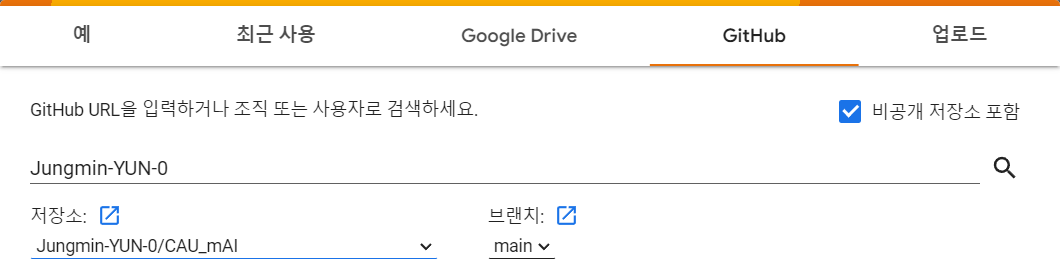

##WEEK 3
=========
### 1. Assignment (week1) (수정)

### 2. Assignment (week2)

### 3. Text Classification using NN

>
> ** Assignment(week3)

## 1. Assignment(week1) (수정)

**이전주차 solution 수정본**

**[문제] 'low', 'lower', 'newest', 'widest'에 대하여 BPE를 사용해서 단어집합을 구성하였다. 이때 새로 등장한 단어 'lowest'에 대하여 토큰화를 수행해보자.**

**[Hint]**

1.   lowest를 글자 단위로 분해 → l, o, w, e, s, t
2.   앞서 업데이트된 단어집합을 사용해서 pair를 통합
(이때, 통합을 위한 우선순위는 bpe_codes를 사용(value값이 작을수록 대응하는 key의 우선순위가 높음))

In [1]:
bpe_codes = {('e', 's'): 0,
             ('es', 't'): 1,
             ('l', 'o'): 2,
             ('lo', 'w'): 3,
             ('n', 'e'): 4,
             ('ne', 'w'): 5,
             ('new', 'est'): 6,
             ('w', 'i'): 7,
             ('wi', 'd'): 8,
             ('wid', 'est'): 9}

In [2]:
def get_pairs(word):                 # input: "lowest"

    pairs = set()
    prev_char = word[0]              # l

    for char in word[1:]:            #[owest]
        pairs.add((prev_char, char)) #('l', 'o')  ##('o', 'w')
        prev_char = char             # o          ## w
    return pairs                     #final: {('e', 's'), ('l', 'o'), ('o', 'w'), ('s', 't'), ('w', 'e')}

In [3]:
from IPython.display import display, Markdown, Latex

def encode(orig):

    word = tuple(orig)    # lowest → (l,o,w,e,s,t)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)    # make unigram pairs of the word {('e', 's'), ('l', 'o'), ('o', 'w'), ('s', 't'), ('w', 'e')}

    if not pairs:    # 예를 들어, 'l'이 input으로 들어온 경우 pairs가 빈 집합을 반환 (빈 시퀀스 = False)
        return orig
        
    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))    # bpe_codes.get(pair, float('inf)): bpe_codes에서, pair에 대한 value 값. 딕셔너리에 존재하지 않는 pair면, value값으로 float('inf')를 반환.
        print("candidate for merging: {}".format(bigram))                                # bigram=('e', 's')                                 ## bigram=('es', 't')                ### bigram=('l','o')               #### bigram=('lo','w')

        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break

        first, second = bigram                                                           # first='e', second='s'                             ## first='es', second='t'     
        new_word = []
        i = 0
        while i < len(word):                                                             # len(word)=6                                       ## len(word)=5                                                                         
            try: 
                j = word.index(first, i)    # i번째 위치부터 처음 first가 위치한 자리    # j=3                                               ## j=3                         
                new_word.extend(word[i:j])                                               # new_word=['l', 'o', 'w']                          ## new_word=['l', 'o', 'w']                                              
                i = j             
            except:
                new_word.extend(word[i:])                                                #    new_word=['l', 'o', 'w', 'es', 't']            ##           
                break
            try:
                if word[i] == first and word[i+1] == second:  # and i < len(word)-1:
                    new_word.append(first+second)                                        # new_word=['l', 'o', 'w', 'es']                    ## new_words=['l', 'o', 'w', 'est']
                    i += 2      
                else:    #[2]#
                    new_word.append(word[i])                                                                                 
                    i += 1
            except:    
                new_word.append(word[i])
                i+=1    #[1]#
                break

        new_word = tuple(new_word)                                                       # new_word=('l', 'o', 'w', 'es', 't')               ## new_word=('l', 'o', 'w', 'est') 
        word = new_word                                                                  # word=('l', 'o', 'w', 'es', 't')                   ## word=('l', 'o', 'w', 'est')     

        print("word after merging: {}".format(word))
        if len(word) == 1:    # merging을 반복해서, 초기 input과 같은 형태가 된 경우(더 이상 merge 할게 없는 경우)
            break
        else:
            pairs = get_pairs(word)                                                      # {('es', 't'),('l', 'o'),('o', 'w'),('w', 'es')}   ## {('l','o'), ('o','w'), ('w','est')}

    return word

In [4]:
encode("lowest")   # iteration별 출력 예시 

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't')</tt>

__Iteration 1:__

bigrams in the word: {('l', 'o'), ('s', 't'), ('e', 's'), ('w', 'e'), ('o', 'w')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't')


__Iteration 2:__

bigrams in the word: {('o', 'w'), ('l', 'o'), ('es', 't'), ('w', 'es')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est')


__Iteration 3:__

bigrams in the word: {('o', 'w'), ('w', 'est'), ('l', 'o')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est')


__Iteration 4:__

bigrams in the word: {('w', 'est'), ('lo', 'w')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est')


__Iteration 5:__

bigrams in the word: {('low', 'est')}
candidate for merging: ('low', 'est')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

## 2. Assignment(week2)

**[과제]**

### Skip-Gram 구현하기

**[HINT]**
- 자유롭게 코드 구현 가능(하이퍼파라미터, 모델 세부 구조 등 전부 자유)
- 아래의 가이드라인 코드를 참고해서, 빈칸('''CODE''' 부분)만 채워도 상관없음

### Skip-Gram

<img src = "https://upload.wikimedia.org/wikipedia/commons/9/95/Skip-gram.png" height = 420 width = 360>

In [5]:
'''
자유롭게 코드 작성
'''

'\n자유롭게 코드 작성\n'

**[참고용 가이드라인]**

In [6]:
## using pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
## Skip-Gram 모델 정의
import torch
import torch.nn as nn
import torch.nn.functional as F

embedding_dim = 128
embedding_max_norm = 1   # Embedding Layer의 weight가 너무 커지지 않도록 제한

class SkipGram(nn.Module):
    def __init__(self, embedding_dim, vocab_size: int, context_size=4):
        super(SkipGram, self).__init__()
        ##############################################################
        self.context_size = context_size
        self.vocab_size = vocab_size

        self.embeddings = nn.Embedding(vocab_size, embedding_dim)       # [48, 128]
        self.layer = nn.Linear(embedding_dim, vocab_size*context_size)  # [128, 192]
        ##############################################################
    def forward(self, input):                                           # [1]
        ########################################################                   
        x = self.embeddings(input)                                      # [1, 128] (=[1x48]x[48x128])
        x = self.layer(x)                                               # [1, 192]
        output = F.softmax(x, dim=-1)
        output = output.view(self.context_size, self.vocab_size)        # [4, 48]
        ########################################################
        return output

In [8]:
example_sentence = "In the case of CBOW, one word is eliminated, and the word is predicted from surrounding words. Therefore, it takes multiple input vectors as inputs to the model and creates one output vector. In contrast, Skip-Gram learns by removing all words except one word and predicting the surrounding words in the context through one word.  So, it takes a vector as input and produces multiple output vectors. CBOW and Skip-Gram are different." 
#-----------------------------------------------------------------------
## Data Preprocessing

# Tokenization (just split)
tokenized_sentence = example_sentence.split()

# Make Vocabulary
vocab = set(tokenized_sentence)    # 중복제거
#-----------------------------------------------------------------------
## Make Dictionary _ word2index{word: index}, index2word{index: word}

word2index = {word:index for index, word in enumerate(vocab)}
index2word = {index:word for index, word in enumerate(vocab)}
#-----------------------------------------------------------------------

In [9]:
vocab

{'CBOW',
 'CBOW,',
 'In',
 'Skip-Gram',
 'So,',
 'Therefore,',
 'a',
 'all',
 'and',
 'are',
 'as',
 'by',
 'case',
 'context',
 'contrast,',
 'creates',
 'different.',
 'eliminated,',
 'except',
 'from',
 'in',
 'input',
 'inputs',
 'is',
 'it',
 'learns',
 'model',
 'multiple',
 'of',
 'one',
 'output',
 'predicted',
 'predicting',
 'produces',
 'removing',
 'surrounding',
 'takes',
 'the',
 'through',
 'to',
 'vector',
 'vector.',
 'vectors',
 'vectors.',
 'word',
 'word.',
 'words',
 'words.'}

In [10]:
def make_data(sentence):
  data = []
  ############################################################
  for i in range(2, len(tokenized_sentence)-2):
    input = tokenized_sentence[i]
    target = [tokenized_sentence[i-2],tokenized_sentence[i-1],
              tokenized_sentence[i+1],tokenized_sentence[i+2]]
    data.append((input, target))
  ############################################################
  return data    # input, target pair

data = make_data(example_sentence.split())
data[:10]

[('case', ['In', 'the', 'of', 'CBOW,']),
 ('of', ['the', 'case', 'CBOW,', 'one']),
 ('CBOW,', ['case', 'of', 'one', 'word']),
 ('one', ['of', 'CBOW,', 'word', 'is']),
 ('word', ['CBOW,', 'one', 'is', 'eliminated,']),
 ('is', ['one', 'word', 'eliminated,', 'and']),
 ('eliminated,', ['word', 'is', 'and', 'the']),
 ('and', ['is', 'eliminated,', 'the', 'word']),
 ('the', ['eliminated,', 'and', 'word', 'is']),
 ('word', ['and', 'the', 'is', 'predicted'])]

In [11]:
# Convert Context to Index Vector

def make_index_vector(context, word_to_ix):
  idxs = [word_to_ix[w] for w in context]
  return torch.tensor(idxs)

make_index_vector(['CBOW'], word2index)

tensor([19])

In [12]:
model = SkipGram(embedding_dim, len(vocab))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

EPOCHS=300
for epoch in range(EPOCHS):
    total_loss = 0
    ####################################################################################
    for input, target in data:
      input_ = make_index_vector([input], word2index) 
      output = model(input_)
      total_loss += loss_function(output, make_index_vector(target, word2index))
    ####################################################################################
    if epoch % 50 == 0:
      print('epoch = ',epoch, ', loss = ',total_loss)
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

epoch =  0 , loss =  tensor(263.2729, grad_fn=<AddBackward0>)
epoch =  50 , loss =  tensor(263.2693, grad_fn=<AddBackward0>)
epoch =  100 , loss =  tensor(263.2657, grad_fn=<AddBackward0>)
epoch =  150 , loss =  tensor(263.2618, grad_fn=<AddBackward0>)
epoch =  200 , loss =  tensor(263.2579, grad_fn=<AddBackward0>)
epoch =  250 , loss =  tensor(263.2538, grad_fn=<AddBackward0>)


In [13]:
test_data = 'Skip-Gram'

###############################################################################
test_vector = make_index_vector([test_data], word2index)
result = model(test_vector)
print('Prediction : ', [index2word[torch.argmax(r).item()] for r in result])
###############################################################################

Prediction :  ['except', 'by', 'input', 'Therefore,']


## 3. Text Classification using NN

In [14]:
!pip install torchdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import torch
from torchtext.datasets import AG_NEWS
train_iter = iter(AG_NEWS(split='train'))

In [16]:
for i in AG_NEWS(split='train'):
  print(i)
  break

(3, "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")


In [17]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = AG_NEWS(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [18]:
vocab(['here', 'is', 'an', 'example'])

[475, 21, 30, 5297]

In [19]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x) - 1

In [20]:
print(text_pipeline('here is the an example'))

print(label_pipeline('10'))

[475, 21, 2, 30, 5297]
9


In [21]:
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

train_iter = AG_NEWS(split='train')
dataloader = DataLoader(train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch)

In [22]:
from torch import nn

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [23]:
train_iter = AG_NEWS(split='train')
num_class = len(set([label for (label, text) in train_iter]))
vocab_size = len(vocab)
emsize = 64
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)

In [24]:
import time

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()
    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [25]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
# Hyperparameters
EPOCHS = 10 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

| epoch   1 |   500/ 1782 batches | accuracy    0.687
| epoch   1 |  1000/ 1782 batches | accuracy    0.857
| epoch   1 |  1500/ 1782 batches | accuracy    0.879
-----------------------------------------------------------
| end of epoch   1 | time:  9.53s | valid accuracy    0.887 
-----------------------------------------------------------
| epoch   2 |   500/ 1782 batches | accuracy    0.898
| epoch   2 |  1000/ 1782 batches | accuracy    0.900
| epoch   2 |  1500/ 1782 batches | accuracy    0.900
-----------------------------------------------------------
| end of epoch   2 | time:  7.26s | valid accuracy    0.898 
-----------------------------------------------------------
| epoch   3 |   500/ 1782 batches | accuracy    0.913
| epoch   3 |  1000/ 1782 batches | accuracy    0.912
| epoch   3 |  1500/ 1782 batches | accuracy    0.915
-----------------------------------------------------------
| end of epoch   3 | time:  7.12s | valid accuracy    0.908 
-------------------------------

In [26]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.908


In [27]:
ag_news_label = {1: "World",
                 2: "Sports",
                 3: "Business",
                 4: "Sci/Tec"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "MEMPHIS, Tenn. – Four days ago, Jon Rahm was \
    enduring the season’s worst weather conditions on Sunday at The \
    Open on his way to a closing 75 at Royal Portrush, which \
    considering the wind and the rain was a respectable showing. \
    Thursday’s first round at the WGC-FedEx St. Jude Invitational \
    was another story. With temperatures in the mid-80s and hardly any \
    wind, the Spaniard was 13 strokes better in a flawless round. \
    Thanks to his best putting performance on the PGA Tour, Rahm \
    finished with an 8-under 62 for a three-stroke lead, which \
    was even more impressive considering he’d never played the \
    front nine at TPC Southwind."

model = model.to("cpu")

print("This is a %s news" %ag_news_label[predict(ex_text_str, text_pipeline)])

This is a Sports news


**[참고자료]**

https://tutorials.pytorch.kr/beginner/text_sentiment_ngrams_tutorial.html